In [1]:
import pandas as pd 
import seaborn as sns
import metapredict as meta
import matplotlib.pyplot as plt
import numpy as np
import random

/opt/anaconda3/envs/jupyter_env/lib/python3.10/site-packages/alphaPredict/backend/parrot_alpha.py:128: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  brnn_network.load_state_

In [2]:
lambert_TFs = pd.read_csv("../data/LambertTFs.csv")
lambert_TFs

,Unnamed: 0,GeneName,ProteinSeq
0,0,sp|P23511|NFYA_HUMAN,MEQYTANSNSSTEQIVVQAGQIQQQQQGGVTAVQLQTEAQVASASG...
1,1,sp|Q96QS3|ARX_HUMAN,MSNQYQEEGCSERPECKSKSPTLLSSYCIDSILGRRSPCKMRLLGA...
2,2,sp|P31270|HXA11_HUMAN,MDFDERGPCSSNMYLPSCTYYVSGPDFSSLPSFLPQTPSSRPMTYS...
3,3,sp|P50221|MEOX1_HUMAN,MDPAASSCMRSLQPPAPVWGCLRNPHSEGNGASGLPHYPPTPFSFH...
4,4,sp|P57073|SOX8_HUMAN,MLDMSEARSQPPCSPSGTASSMSHVEDSDSDAPPSPAGSEGLGRAG...
...,...,...,...
1603,1603,sp|P35227|PCGF2_HUMAN,MHRTTRIKITELNPHLMCALCGGYFIDATTIVECLHSFCKTCIVRY...
1604,1604,sp|Q9BS34|ZN670_HUMAN,MDSVSFEDVAVAFTQEEWALLDPSQKNLYRDVMQEIFRNLASVGNK...
1605,1605,sp|P17098|ZNF8_HUMAN,MDPEDEGVAGVMSVGPPAARLQEPVTFRDVAVDFTQEEWGQLDPTQ...
1606,1606,sp|Q9UJW7|ZN229_HUMAN,METLTSRHEKRALHSQASAISQDREEKIMSQEPLSFKDVAVVFTEE...


In [3]:
lambert_TFs["NG_prop"] = lambert_TFs["ProteinSeq"].str.count("NG") / lambert_TFs["ProteinSeq"].str.len()
lambert_TFs[lambert_TFs["GeneName"].str.contains("SOX6")]

,Unnamed: 0,GeneName,ProteinSeq,NG_prop
254,254,sp|P35712|SOX6_HUMAN,MSSKQATSPFACAADGEDAMTQDLTSREKEEGSDQHVASHLPLHPI...,0.002415


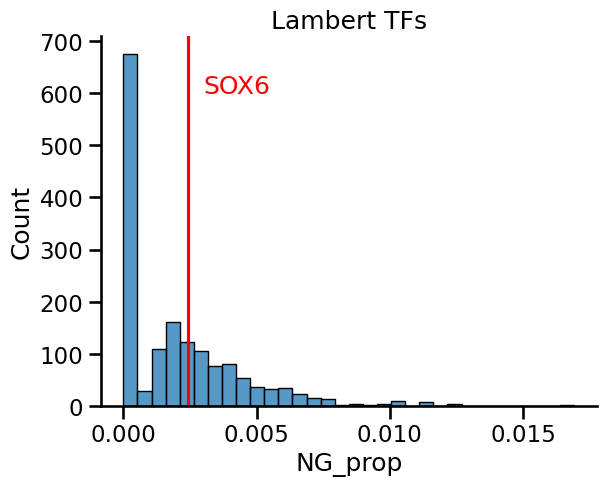

In [4]:
sns.set_context('talk')
sns.histplot(lambert_TFs["NG_prop"])
plt.axvline(0.002415, color = "red")
plt.text(0.003, 600, "SOX6", color = "red")
plt.title("Lambert TFs")
sns.despine()

In [7]:
disordered_seqs = []
folded_seqs = []

for seq in lambert_TFs["ProteinSeq"]:
    preds = meta.predict_disorder_domains(seq)
    disordered_seqs += preds.disordered_domains
    folded_seqs += preds.folded_domains

/opt/anaconda3/envs/jupyter_env/lib/python3.10/site-packages/metapredict/backend/py_predictor_v2.py:93: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model = torch.lo

In [8]:
disordered_seqs_df = pd.DataFrame(disordered_seqs)
disordered_seqs_df["NG_prop"] = disordered_seqs_df[0].str.count("NG") /disordered_seqs_df[0].str.len()
disordered_seqs_df

,0,NG_prop
0,MEQYTANSNSSTEQIVVQAGQIQQQQQGGVTAVQLQTEAQVASASG...,0.000000
1,HAMARKRGEGGRFFSPKEKDSPHMQDPNQADEEAMTQIIRVS,0.000000
2,MSNQYQEEGCSERPECKSKSPTLLSSYCIDSILGRRSPCKMRLLGA...,0.003077
3,GAQTHPPGLPFPGPLSATHPLSPYLDASPFPPHHPALDSAWTAAAA...,0.000000
4,MDFDERGPCSSNMYLPSCTYYVSGPDFSSLPSFLPQTPSSRPMTYS...,0.004049
...,...,...
3458,EALGCDPPLSQDERTHRSDRPFKCNQCGKCFIQSSHLIRHQITHTR...,0.000000
3459,METLTSRHEKRALHSQASAISQDREEKIMSQEPLSFKDVAVVFTEE...,0.004673
3460,SVLHRINPGENGLKSNEYRNGFRDDADLPPHPRVPLKEKLCQYDEF...,0.020619
3461,METRPTALMSSTVAAAAPAAGAASRKESPGRWGLGEDPTGVSP,0.000000


In [9]:
folded_seqs_df = pd.DataFrame(folded_seqs)
folded_seqs_df["NG_prop"] = folded_seqs_df[0].str.count("NG") /folded_seqs_df[0].str.len()
folded_seqs_df

,0,NG_prop
0,MLEEEPLYVNAKQYHRILKRRQARAKLEAEGKIPKERRKYLHESRHR,0.000000
1,RKQRRYRTTFTSYQLEELERAFQKTHYPDVFTREELAMRLDLTEAR...,0.000000
2,YTKYQIRELEREFFFSVYINKEKRLQLSRMLNLTDRQVKIWFQNRR...,0.000000
3,ERTAFTKEQLRELEAEFAHHNYLTRLRRYEIAVNLDLSERQVKVWF...,0.000000
4,ERFPACIRDAVSQVLKGYDWSLVPMPVRGGGGGALKAKPHVKRPMN...,0.000000
...,...,...
2754,YKCTDCGKSFNHNAHLTVHKRIHTGERPYMCKECGKAFSQNSSLVQ...,0.000000
2755,CNWDDDSFCWISCHVDHRFPEIDKPCGCNKCRKDCIKN,0.000000
2756,RCDVCGKGFRYKSVLLIHQGVHTGRRPYKCEECGKAFGRSSNLLVH...,0.000000
2757,SLQCRVCGDSSSGKHYGIYACNGCSGFFKRSVRRRLIYRCQVGAGM...,0.014085


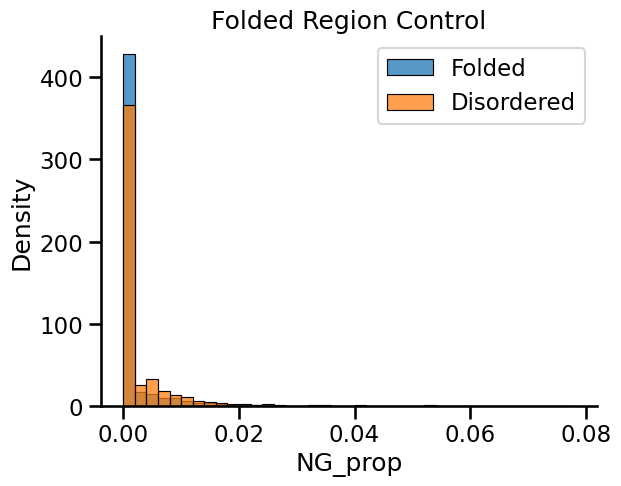

In [10]:
plt.title("Folded Region Control")
bins = np.arange(0, max(max(folded_seqs_df["NG_prop"]), max( disordered_seqs_df["NG_prop"])) + 0.002, 0.002)
sns.histplot(data = folded_seqs_df, x = "NG_prop", label = "Folded", stat = "density", bins = bins)
sns.histplot(data = disordered_seqs_df, x = "NG_prop", label = "Disordered", stat = "density", bins = bins)
plt.legend()
sns.despine();

In [20]:
disordered_seqs_df['shuffled'] = ["".join(random.sample(_, len(_))) for _ in disordered_seqs_df[0]]
disordered_seqs_df["shuffled_NG_prop"] = disordered_seqs_df["shuffled"].str.count("NG")/ disordered_seqs_df[0].str.len()
disordered_seqs_df

/var/folders/hw/xx051vr9457c7lrngf2mypgr0000gn/T/ipykernel_857/2559780168.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  disordered_seqs_df["shuffled_NG_prop"] = disordered_seqs_df["shuffled"].str.count("NG")/ disordered_seqs_df[0].str.len()


,0,NG_prop,shuffled,shuffled_0,shuffled_NG_prop_0,shuffled_1,shuffled_NG_prop_1,shuffled_2,shuffled_NG_prop_2,shuffled_3,...,shuffled_NG_prop_393,shuffled_394,shuffled_NG_prop_394,shuffled_395,shuffled_NG_prop_395,shuffled_396,shuffled_NG_prop_396,shuffled_397,shuffled_NG_prop_397,shuffled_NG_prop
0,MEQYTANSNSSTEQIVVQAGQIQQQQQGGVTAVQLQTEAQVASASG...,0.000000,GQGQEETPPPAGSTPPQQVSNQPTGLGVTQSNMNLGGGQVQIVGQV...,QGIQPNQLYMVQTLVQAQGVGNMNVVGQSGSRTMATMPQGVQAMAV...,0.003876,VAVIEQAAVPQVLGSAAQVAAGVNQGAGGVMQTGETIQIQQQTVQQ...,0.000000,QVQPVDGTMAVGNGESSQAQVQPQVSPLTGVGTQAQVQPQIGQTGA...,0.003876,GTVAQQVAGMGVVITIVVVQQIGVSGGAIALGTTVQSAVPMSQQGL...,...,0.003876,QTSLVGGVQVYQGQQGLVSQITQLQTGAVILPGQSSSVASPGSQQG...,0.003876,VQVAGPGQPQGSTTSIVTQQQQVQLGIQVAGNQSIGVAQMQIAQTG...,0.003876,VQQPSQQEQAALQQIAAAAPTQVTQISMTQQTLQGITLVTQVSIQQ...,0.003876,AGMGPQQQPPPVGVGISAGAGVVMVSTQQIGQAQVPSMQPTALQTQ...,0.003876,0.000000
1,HAMARKRGEGGRFFSPKEKDSPHMQDPNQADEEAMTQIIRVS,0.000000,SKGHHGQGMEDIPSQKPAMSNKADRQFVREMAERATPFRIDE,AGEQHPTPSAAKQGVKARPMSEFDRMNMGHRFKDQSERIDEI,0.000000,RRDEQGKAKSHHTMDMRAPQGNEEQKSMPRPDAASFEIFGIV,0.000000,ENKHEPTAPAHKGRKQGIIFVDRPFGQSQMRDMEESMASARD,0.000000,SAAKQSRGPKQAFVRDKGMISEQTANEMRHEDPMHERDGFPI,...,0.000000,FSRRDFKPNAEIMVKPAISGQPAEQRAQDEEDHSMGGTMHKR,0.000000,RVQRARHMKDFAQMESIKFNGGAIPDMHKEESPRSAGDEQTP,0.023810,AGAPTFGNDISHAPQRREHMQREVGDKMKFADPSKRSMQEIE,0.000000,KIMEIAQRDDMSGGFAPMGREETEKQRQSKANDVFHHARPPS,0.000000,0.000000
2,MSNQYQEEGCSERPECKSKSPTLLSSYCIDSILGRRSPCKMRLLGA...,0.003077,EQGLPSAATAADPVACGPHSREAEEAADSEAPARIPGGRYKALLSP...,NHGPSGAPAGSGPQKNLREARSLDLDEMLVMESLQPAEESARAGSL...,0.000000,ASGDPGLSASPTVESDPLASETVALAPAGYLKGTNAAECAELAGGE...,0.000000,YVLTEATVAADPLRTPILETDEAEDPLSCESAMAIVKLGDAVGLKA...,0.000000,GSEGADAKQEPAAAARGRGGLLPQCFLAGPIAPLPYALHRSSRKEA...,...,0.000000,YKEAGTETERAALAMAEGADPPGGPESGRARGPATAVKVSRMARPP...,0.003077,ALEDAGLSLSAPGLLHTPPGSGGPPEAEAKAEEYPEGPEIMLLPLA...,0.000000,AGEPTRERCESLLLAKAGDGGELKPGGHQLLSSVGSGCWKEEPCAA...,0.000000,DALSLMAAPHALTLELPKGPSTRYKKELFPKKLSGPARSADAPPYA...,0.000000,0.000000
3,GAQTHPPGLPFPGPLSATHPLSPYLDASPFPPHHPALDSAWTAAAA...,0.000000,VPEGAHFQGSHPFLGLSLVPAAPANSAATAPASKLTSTPAQAADPG...,PLGALSATFKYAGQPGAALSSEAWRVPNAAGKRCAPLTQEIAPASQ...,0.000000,SPATPALSLPPDDLAPLTLPSPPQIRAAAFFTAAETIQGSALPCPL...,0.000000,TLSAPTARAFEASWCSTHHPLTGKPTASHGEAPLAPFAPFEPADGA...,0.000000,PASAAQFAFDAANIVPPPGFLATFQTTFPALPAPTGQPLPPSSTAL...,...,0.000000,AILFGATSPVPAQDPKAAPTGATQAGEVAFSRPILADSSMVSHATP...,0.005780,THPKGFPSLPCSPGFGLASAFHSNSPAVRAAASDQLGGETTTAGTL...,0.000000,APPEGGALALPTAMAAFFLPALHTAAPLSAIVQKPRPAHPKAGATG...,0.000000,HPKFSPAAEFAAATRDAPLVAPTPHPAGDATAPTANLLAGGAHRAA...,0.000000,0.000000
4,MDFDERGPCSSNMYLPSCTYYVSGPDFSSLPSFLPQTPSSRPMTYS...,0.004049,SKREAVATAFSQPRTPKRTSMSTDQAPKPPGRNGVGQGPPPDAASI...,PVREPAKLLNGESVPCNDTGYASHQFYSVAPYPVNPPSYSSATMQD...,0.004049,EYIKSEAQNPLGGKESPQGFAQTTQPAFTPFVSPGAVPGRGGDEGA...,0.000000,LEPAPVARYNNAVNVDMLGEPAHNKSQLSSPSGKSCGGFDSPGEPA...,0.000000,SQYAPAGGEGFPEKVPAVTEQGYRHPPRATELYAPSSYTEAGSKAA...,...,0.000000,YYEPNNFSPGTPIEVGVTLRPGVYYESDLSDVAAAHCTTQPRAPMS...,0.004049,ALVFQSRASENSFKTDCSPGPTAQYGTPMTERLPSDPALLAPFYEL...,0.004049,PSSYDTHPHSGEYAEVAPRASSRCNAGSLRTLTFSAVFPSSETVLG...,0.004049,RCYCHHASYSGACWRPGSLQSASEEGVPRPPEAGAKDQAVRDGAAP...,0.000000,0.008097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3458,EALGCDPPLSQDERTHRSDRPFKCNQCGKCFIQSSHLIRHQITHTR...,0.000000,SARLGRNVLTMEVFQANSTGGRCPQICGASELSEPQPRHQFTNPPS...,IGISCVSHSQHLEPDCTKRSAPMPRASVTSSTLFHNQNGQHRPEHC...,0.007692,MISMLLENRQRAPAQQIQQEIKAHRQKSFSRVRAHVKKSSGESEFQ...,0.000000,QNETSKITIIPRHRHSRQDSCSAAEAVHEGDSRSHSPQLLGGEQKF...,0.000000,GAPEVEMGPRCDQEHISPSSKTPRKVHHPPLEERGEVNLFRFSQVT...,...,0.000000,IQETCELSSRDGEVSTHRIFVSHVRRSIKQEADLSEAPPHGQRHLS...,0.007692,VEAETIGKCHMFQRVNSRINSESSEDRRETGSAHLNLFRGQQQVLE...,0.000000,RSLGVAKQHLGFAHQQEEPNSGPQLIQNELAAKIRSEDQQVTQHGI...,0.000000,TVSIGTEHEPSQKRCESDHAREFVIRNTLSTSKSDGQRKVRERSKH...,0.000000,0.000000
3459,METLTSRHEKRALHSQASAISQDREEKIMSQEPLSFKDVAVVFTEE...,0.004673,SFLIKQEYSHPWEYQEASDTPLLRFQGLEETGQYLGRKLS

In [18]:
# for i in np.arange(1000):
#     disordered_seqs_df['shuffled_' + str(i)] = ["".join(random.sample(_, len(_))) for _ in disordered_seqs_df[0]]
#     disordered_seqs_df["shuffled_NG_prop_" + str(i)] = disordered_seqs_df["shuffled_" + str(i)].str.count("NG")/ disordered_seqs_df[0].str.len()
# disordered_seqs_df

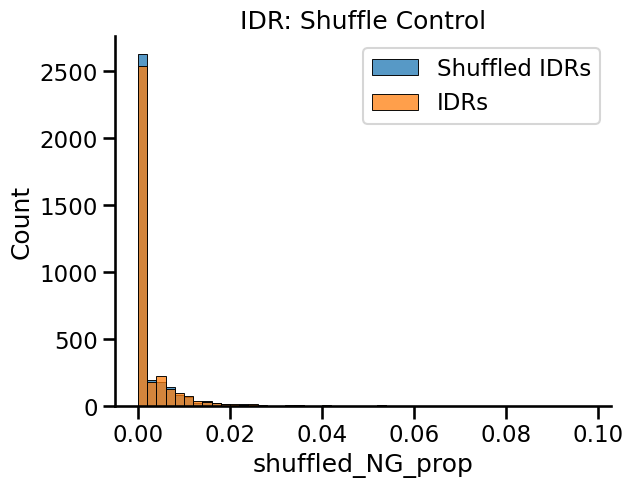

In [21]:
plt.title("IDR: Shuffle Control")
sns.histplot(disordered_seqs_df["shuffled_NG_prop"], bins = np.arange(0, 0.1, 0.002), label = "Shuffled IDRs")
sns.histplot(disordered_seqs_df["NG_prop"], bins = np.arange(0, 0.1, 0.002), label = "IDRs")
plt.legend()
sns.despine();